In [17]:
import pandas as pd

fruits = pd.read_csv('../Data/fruits.csv')
fruits.head()

,length,weight,name
0,25.4,242.0,apple
1,26.3,290.0,apple
2,26.5,340.0,apple
3,29.0,363.0,apple
4,29.0,430.0,apple


### Training과 Test Set으로 분리

In [18]:
train_input = fruits.loc[:34, ['length','weight']]
train_input.tail()

,length,weight
30,38.5,920.0
31,38.5,955.0
32,39.5,925.0
33,41.0,975.0
34,41.0,950.0


In [19]:
train_target = fruits.loc[:34,'name']
train_target.tail()

30    apple
31    apple
32    apple
33    apple
34    apple
Name: name, dtype: object

In [20]:
len(train_input) == len(train_target)

True

#### Test

In [21]:
test_input = fruits.loc[35:, ['length','weight']]
test_input.tail()

,length,weight
44,12.2,12.2
45,12.4,13.4
46,13.0,12.2
47,14.3,19.7
48,15.0,19.9


In [22]:
test_target = fruits.loc[35:,'name']
test_target.tail()

44    berry
45    berry
46    berry
47    berry
48    berry
Name: name, dtype: object

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
kn = KNeighborsClassifier()

In [25]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

In [26]:
import matplotlib.pyplot as plt

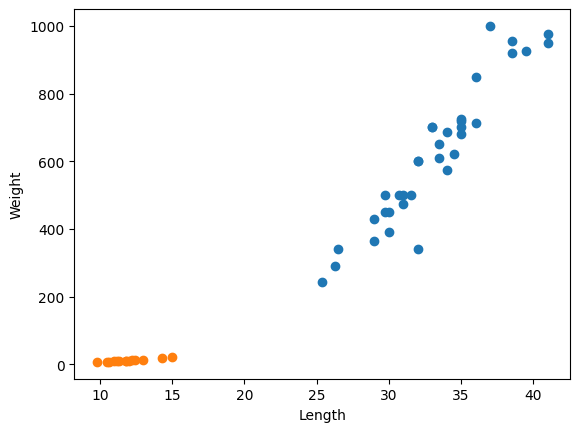

In [27]:
plt.scatter(train_input.length, train_input.weight)
plt.scatter(test_input.length, test_input.weight)
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

### Sampling 편향이 발생하였다

### Numpy를 이용하여 샘플링 편향 제거하기

In [28]:
import numpy as np

In [29]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [30]:
index[:35]

array([13, 45, 47, 44, 17, 27, 26, 25, 31, 19, 12,  4, 34,  8,  3,  6, 40,
       41, 46, 15,  9, 16, 24, 33, 30,  0, 43, 32,  5, 29, 11, 36,  1, 21,
        2])

In [32]:
train_input = fruits.loc[list(index[:35]), ['length','weight']]
train_target = fruits.loc[list(index[:35]), ['name']]

In [33]:
test_input = fruits.loc[list(index[35:]), ['length','weight']]
test_target = fruits.loc[list(index[35:]), ['name']]

In [34]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

/Users/jyh/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


1.0

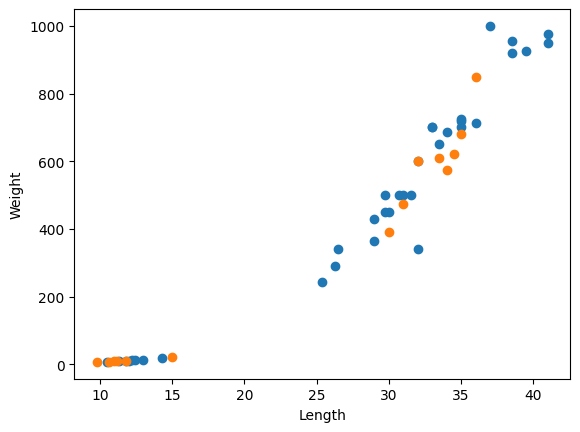

In [35]:
plt.scatter(train_input.length, train_input.weight)
plt.scatter(test_input.length, test_input.weight)
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

---
### scikit-learn을 이용

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
train_input, test_input, train_target, test_target = train_test_split(fruits[['length','weight']],fruits['name'], random_state=42)

In [38]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [39]:
# 빈도수 세기
import collections

In [40]:
collections.Counter(test_target)

Counter({'apple': 10, 'berry': 3})

In [41]:
# apple과 berry의 비율
len(fruits[fruits['name'] == 'apple']) / len(fruits[fruits['name'] == 'berry'])

2.5

In [42]:
10 / 3

3.3333333333333335

> apple과 berry의 비율이 비슷하게 할 필요가 있다. <- Sampling의 기본

In [43]:
train_input, test_input, train_target, test_target = train_test_split(fruits[['length','weight']],fruits['name'], random_state=42, stratify=fruits['name'])

In [44]:
collections.Counter(test_target)

Counter({'apple': 9, 'berry': 4})

In [45]:
9 / 4

2.25

In [46]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0